#  Analysis of Pepe Unchained (PEPU)

**The main goal of this study is to have fun analyzing the financial data of Pepe Unchained (PEPU), with the sole purpose of practicing Python.**

### Author: 
## Matteo Ciccarese

Pepe Unchained (PEPU) is an innovative layer-2 blockchain based on Ethereum, which aims to combine meme culture with advanced technologies to offer scalable and fast solutions.Release date: December 11, 2024.

A few key points about Pepe Unchained’s young history:

The PEPU presale was successfully completed on December 10, 2024, raising a total of $73.78 million3.

The token reached its all-time high of €0.06682 on December 12, 2024, just one day after its launch.

Despite its young age, PEPU has already attracted the attention of investors, with a trading volume in the last 24 hours of approximately €4.19 million.

The project is billed as “the future of meme coins,” built on a Layer 2 blockchain for speed, security, and low fees.

Since Pepe Unchained has only been around for a little over a month, it is still in a very early stage of its development and adoption in the cryptocurrency market.

Objectives:
- Evaluate the potential of PEPU by analyzing historical data, on-chain metrics, and social media sentiment.
- Predict short-term price trends of PEPU.
- Identify growth drivers or challenges (adoption, technology, community).

*Libraries:*

In [1]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

### 1. Required Data

In [2]:
# CoinGecko API URL to get historical data for a cryptocurrency
crypto_id = "pepe-unchained" 
currency = "usd"
days = 365  # number of days of historical data to retrieve (e.g. 365 days = 1 year)

# URL construction for historical data
url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart?vs_currency={currency}&days={days}"

# Make request to API
response = requests.get(url)

In [3]:
# Verify that the response was received correctly
if response.status_code == 200:
    data = response.json()
    
    # Extract historical price data
    prices = data['prices']
    volumes = data['total_volumes']
    market_caps = data['market_caps']

    # Create a Pandas DataFrame to organize the data
    prices_df = pd.DataFrame(prices, columns=['timestamp', 'price'])
    volumes_df = pd.DataFrame(volumes, columns=['timestamp', 'volume'])
    market_caps_df = pd.DataFrame(market_caps, columns=['timestamp', 'market_cap'])

    # Convert timestamps to readable dates
    prices_df['date'] = pd.to_datetime(prices_df['timestamp'], unit='ms')
    volumes_df['date'] = pd.to_datetime(volumes_df['timestamp'], unit='ms')
    market_caps_df['date'] = pd.to_datetime(market_caps_df['timestamp'], unit='ms')

    # Merge DataFrames into a single DataFrame
    merged_df = pd.merge(prices_df, volumes_df[['date', 'volume']], on='date', how='left')
    merged_df = pd.merge(merged_df, market_caps_df[['date', 'market_cap']], on='date', how='left')

    # Setting date as index
    merged_df.set_index('date', inplace=True)

    # Show top 5 data for check
    print(merged_df.head())

else:
    print(f"Error: Unable to fetch data (status code: {response.status_code})")


                timestamp     price        volume  market_cap
date                                                         
2024-12-12  1733961600000  0.050126  4.191458e+07         0.0
2024-12-13  1734048000000  0.050126  4.191458e+07         0.0
2024-12-14  1734134400000  0.027050  4.273827e+07         0.0
2024-12-15  1734220800000  0.024652  2.899538e+07         0.0
2024-12-16  1734307200000  0.023307  1.497543e+07         0.0


### 2. Data Analysis

Display descriptive statistics.

describe(): Displays basic statistics such as mean, standard deviation, minimum, maximum, and percentiles for all numeric columns (price, volume, market cap).

In [4]:
# Descriptive statistics of the DataFrame
print("Statistical Summary of Data:")
print(merged_df.describe())

Statistical Summary of Data:
          timestamp      price        volume    market_cap
count  3.600000e+01  36.000000  3.600000e+01  3.600000e+01
mean   1.735473e+12   0.015760  9.997560e+06  8.690030e+07
std    9.093619e+08   0.009439  1.221334e+07  4.008099e+07
min    1.733962e+12   0.009085  5.124829e+05  0.000000e+00
25%    1.734718e+12   0.010849  2.495873e+06  8.010450e+07
50%    1.735474e+12   0.012766  4.026058e+06  9.432643e+07
75%    1.736230e+12   0.014941  1.000346e+07  1.100106e+08
max    1.736966e+12   0.050126  4.273827e+07  1.579429e+08


In [5]:
# Correlation between the variables: price, volume and market cap
correlation_matrix = merged_df[['price', 'volume', 'market_cap']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               price    volume  market_cap
price       1.000000  0.873415   -0.618707
volume      0.873415  1.000000   -0.532221
market_cap -0.618707 -0.532221    1.000000


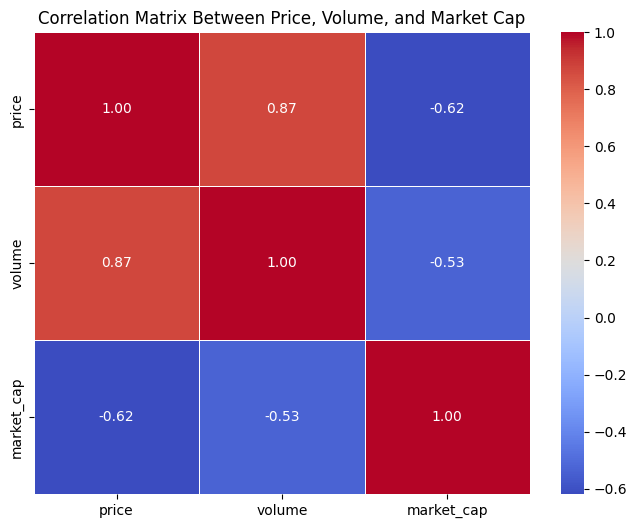

In [6]:
# Display of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Between Price, Volume, and Market Cap")
plt.show()

**Volume & Price**

A correlation of 0.87 between volume and price is a strong positive correlation, meaning that there is a fairly strong relationship between these two variables: when one increases, the other tends to increase in a similar manner.

When trading volume increases, it could indicate that more investors are buying or selling PEPU, which often leads to an increase in demand and therefore in price.
An increase in volume could reflect increased interest in the market, with more people trading the token, which could cause the price to push up.

Conclusion:
A correlation of 0.87 suggests a significant relationship between volume and price. This is good news, as it implies that trading volume could be a good indicator for predicting price movements. However, it is important to monitor other variables, such as external events and market sentiment, to get a full picture of PEPU market behavior.

**Market Cup & Price**

A correlation of -0.61 between market cap and price indicates a moderate negative correlation. This means that, in general, when the price of Pepe Unchained (PEPU) increases, the market cap tends to decrease, or vice versa, although not perfectly.

Market cap is calculated as price × circulating supply (i.e., the number of tokens in circulation).
If there is a negative correlation between price and market cap, it could mean that the amount of PEPU in circulation is increasing significantly. Therefore, while the price may remain stable or decrease, the market cap may be elevated due to an increase in circulating supply.

Conclusion:
A correlation of -0.61 between market cap and price suggests that the growth in PEPU supply may be partially explaining the market cap, while the price may not grow proportionately. Monitoring token supply and other market factors will be crucial to better understand this relationship.

**Market Cup & Volume**

A correlation of -0.53 between market cap and volume suggests that when volume increases, market cap may not increase in tandem, and in some cases may decrease. This could be the result of market movements that see an increase in transactions (volume) without a corresponding increase in price, which could temporarily reduce market cap.

#### Analysis over time

Let's now analyze the trend of the Price over time. Let's use a line plot and also insert the mean and the standard deviation.

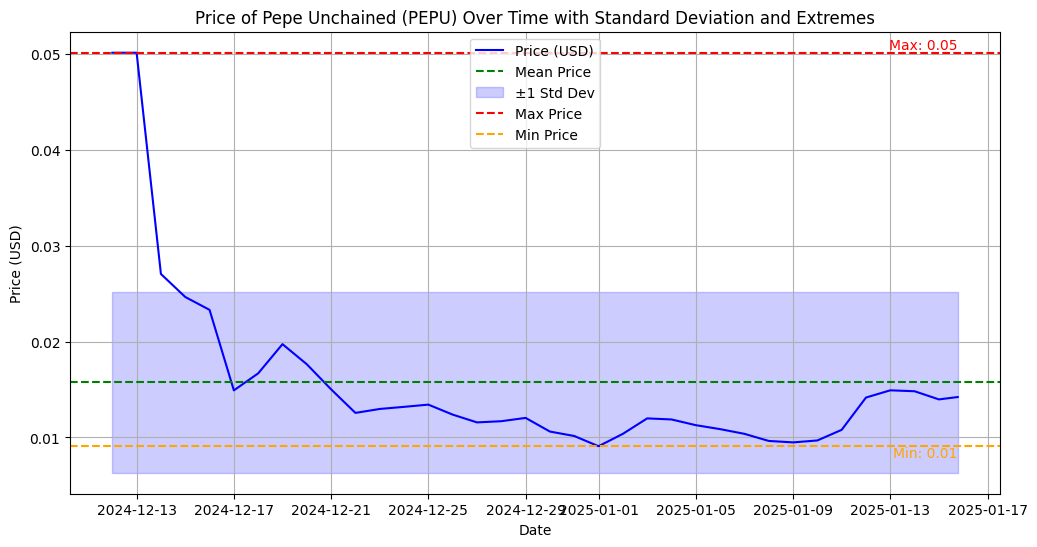

In [7]:
# Calculation of the average, standard deviation, maximum and minimum
mean_price = merged_df['price'].mean()
std_dev_price = merged_df['price'].std()
max_price = merged_df['price'].max()
min_price = merged_df['price'].min()

# Price plot with standard deviation and extremes
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['price'], label="Price (USD)", color='blue')
plt.axhline(mean_price, color='green', linestyle='--', label='Mean Price')
plt.fill_between(
 merged_df.index,
 mean_price - std_dev_price,
 mean_price + std_dev_price,
 color='blue',
 alpha=0.2,
 label='±1 Std Dev'
)

# Lines for maximum and minimum
plt.axhline(max_price, color='red', linestyle='--', label='Max Price')
plt.axhline(min_price, color='orange', linestyle='--', label='Min Price')

# Annotations for extrema
plt.text(merged_df.index[-1], max_price, f'Max: {max_price:.2f}', color='red', fontsize=10, va='bottom', ha='right')
plt.text(merged_df.index[-1], min_price, f'Min: {min_price:.2f}', color='orange', fontsize=10, va='top', ha='right')

# Details of graphic
plt.title('Price of Pepe Unchained (PEPU) Over Time with Standard Deviation and Extremes')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

The curve shows a clear downward trend following the first two days since the launch at Price = .05. The minimum peak was reached on January 1st but considering the trend from December 15th to January 13th the price is in a consolidation phase.

--------------------------

*Cryptocurrency volume* is the number of units of a cryptocurrency traded in a given period (usually a day). It is a key indicator for analyzing the level of activity and interest in the market for a particular cryptocurrency.

**Let´s now analize the trand of the Volume over time.**

Why is volume important for PEPU (Pepe Unchained)?

**Niche Project**: As a niche cryptocurrency, volume is crucial to gauge market interest. Increasing volume may indicate that PEPU is attracting more attention.

**Market Volatility**: Lesser-known cryptocurrencies tend to be more volatile. High volume may accompany more extreme price movements.

**Manipulation Risk**: Low volume may make PEPU more vulnerable to market manipulation by large investors (whales).

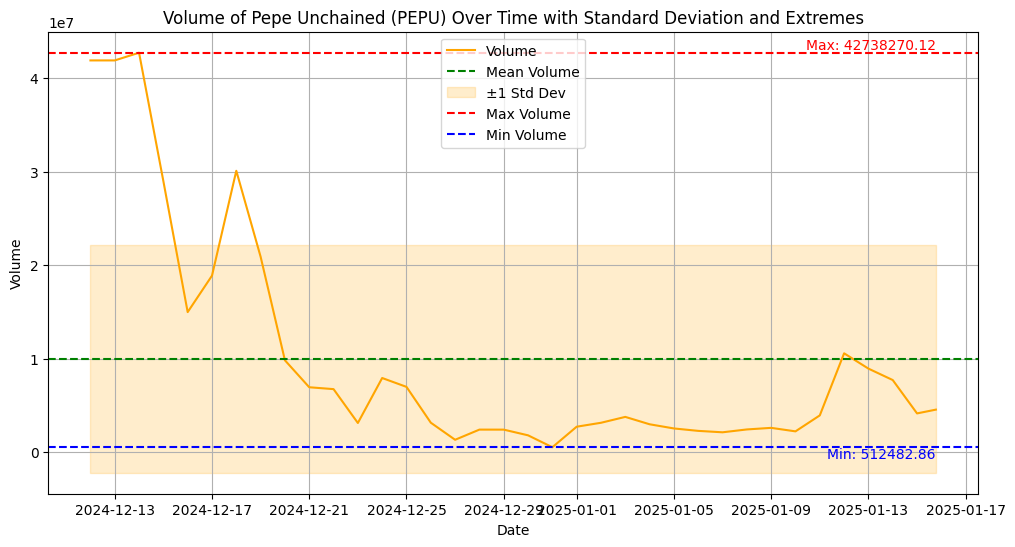

In [8]:
# Calculation of the average, standard deviation, maximum and minimum for the volume
mean_volume = merged_df['volume'].mean()
std_dev_volume = merged_df['volume'].std()
max_volume = merged_df['volume'].max()
min_volume = merged_df['volume'].min()

# Volume plot with standard deviation and extremes
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['volume'], label="Volume", color='orange')
plt.axhline(mean_volume, color='green', linestyle='--', label='Mean Volume')
plt.fill_between(
 merged_df.index,
 mean_volume - std_dev_volume,
 mean_volume + std_dev_volume,
 color='orange',
 alpha=0.2,
 label='±1 Std Dev'
)

# Lines for maximum and minimum
plt.axhline(max_volume, color='red', linestyle='--', label='Max Volume')
plt.axhline(min_volume, color='blue', linestyle='--', label='Min Volume')

# Annotations for extrema
plt.text(merged_df.index[-1], max_volume, f'Max: {max_volume:.2f}', color='red', fontsize=10, va='bottom', ha='right')
plt.text(merged_df.index[-1], min_volume, f'Min: {min_volume:.2f}', color='blue', fontsize=10, va='top', ha='right')

# Chart details
plt.title('Volume of Pepe Unchained (PEPU) Over Time with Standard Deviation and Extremes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

Even from this graph we can see how the trend of the curve is basically downward. However, even here we can say that the currency is in a consolidation phase.

To better analyze this value we create a graph where we superimpose Price and Volume.

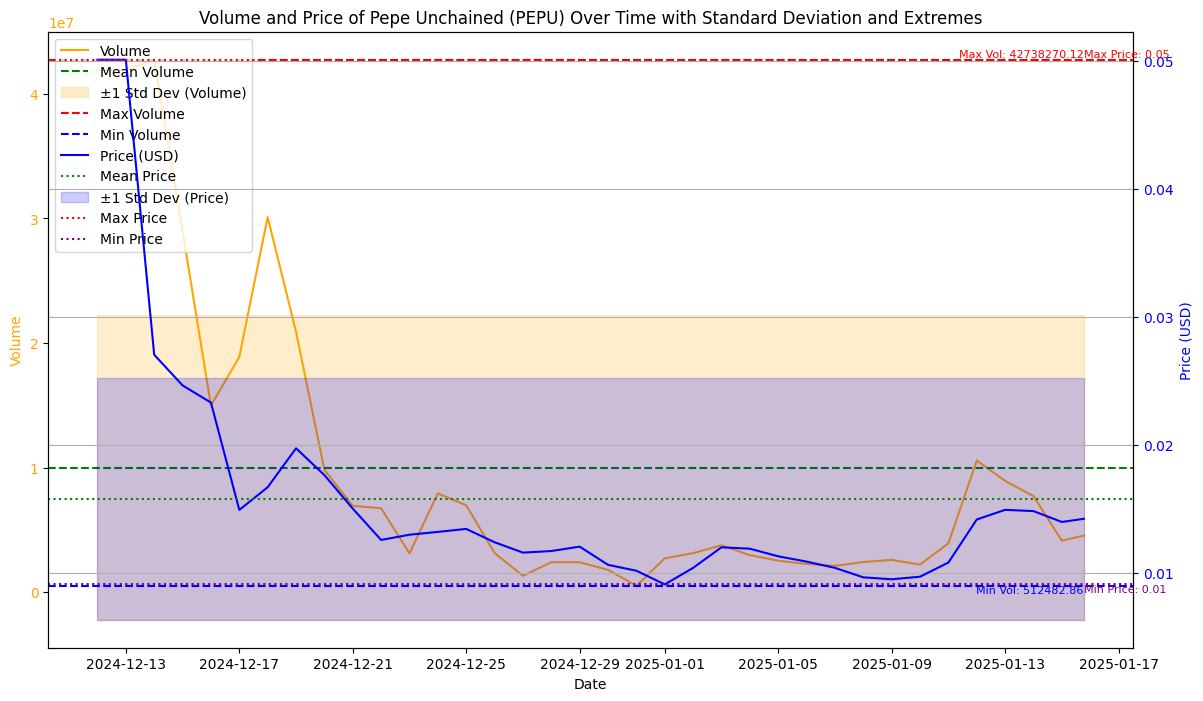

In [9]:
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# Volume plot (left axis)
ax1.plot(merged_df.index, merged_df['volume'], label="Volume", color='orange')
ax1.axhline(mean_volume, color='green', linestyle='--', label='Mean Volume')
ax1.fill_between(
    merged_df.index,
    mean_volume - std_dev_volume,
    mean_volume + std_dev_volume,
    color='orange',
    alpha=0.2,
    label='±1 Std Dev (Volume)'
)
ax1.axhline(max_volume, color='red', linestyle='--', label='Max Volume')
ax1.axhline(min_volume, color='blue', linestyle='--', label='Min Volume')

# Price plot (right axis)
ax2.plot(merged_df.index, merged_df['price'], label="Price (USD)", color='blue')
ax2.axhline(mean_price, color='green', linestyle=':', label='Mean Price')
ax2.fill_between(
    merged_df.index,
    mean_price - std_dev_price,
    mean_price + std_dev_price,
    color='blue',
    alpha=0.2,
    label='±1 Std Dev (Price)'
)
ax2.axhline(max_price, color='red', linestyle=':', label='Max Price')
ax2.axhline(min_price, color='purple', linestyle=':', label='Min Price')

# Annotations for extrema
ax1.text(merged_df.index[-1], max_volume, f'Max Vol: {max_volume:.2f}', color='red', fontsize=8, va='bottom', ha='right')
ax1.text(merged_df.index[-1], min_volume, f'Min Vol: {min_volume:.2f}', color='blue', fontsize=8, va='top', ha='right')
ax2.text(merged_df.index[-1], max_price, f'Max Price: {max_price:.2f}', color='red', fontsize=8, va='bottom', ha='left')
ax2.text(merged_df.index[-1], min_price, f'Min Price: {min_price:.2f}', color='purple', fontsize=8, va='top', ha='left')

# Chart details
plt.title('Volume and Price of Pepe Unchained (PEPU) Over Time with Standard Deviation and Extremes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='orange')
ax2.set_ylabel('Price (USD)', color='blue')

# Adjust colors of tick labels
ax1.tick_params(axis='y', labelcolor='orange')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True)
plt.show()


The chart shows us the presence of a stable volume with a lateral price.
This confirms that we are in a **period of consolidation** in which the market is preparing for a breakout to the upside or downside.

Interesting are the fluctuations between December 17 and 19. These coincide with the announced listing on BingX and MEXC3 and the announcement of the listing schedule on LBank for December 18, 2024.

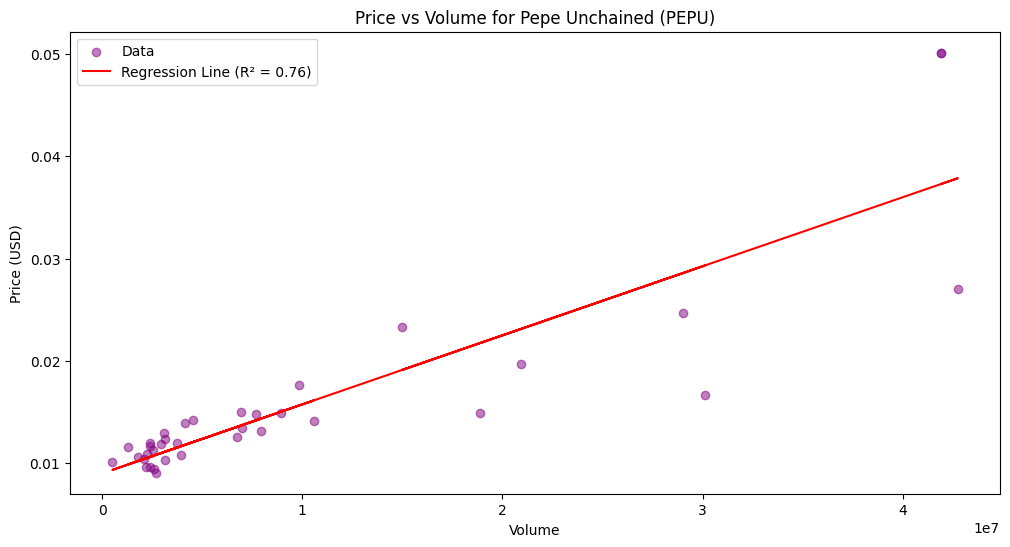

In [10]:
# Calculation of linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['volume'], merged_df['price'])

# Add regression line to graph
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['volume'], merged_df['price'], alpha=0.5, color='purple', label='Data')
plt.plot(merged_df['volume'], intercept + slope * merged_df['volume'], color='red', label=f'Regression Line (R² = {r_value**2:.2f})')
plt.title('Price vs Volume for Pepe Unchained (PEPU)')
plt.xlabel('Volume')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


An R² of 0.76 is considered quite high in the cryptocurrency context, indicating a stronger than usual relationship between price and volume.

------------------------------------------------------

*Market Capitalization* in cryptocurrencies indicates the total value of a cryptocurrency in circulation. It is calculated by multiplying the current price of a single coin by the total number of coins in circulation.

This indicator provides an estimate of the size and total value of a cryptocurrency and is an important indicator of stability. Generally, a higher market capitalization suggests a greater stability and maturity of the project

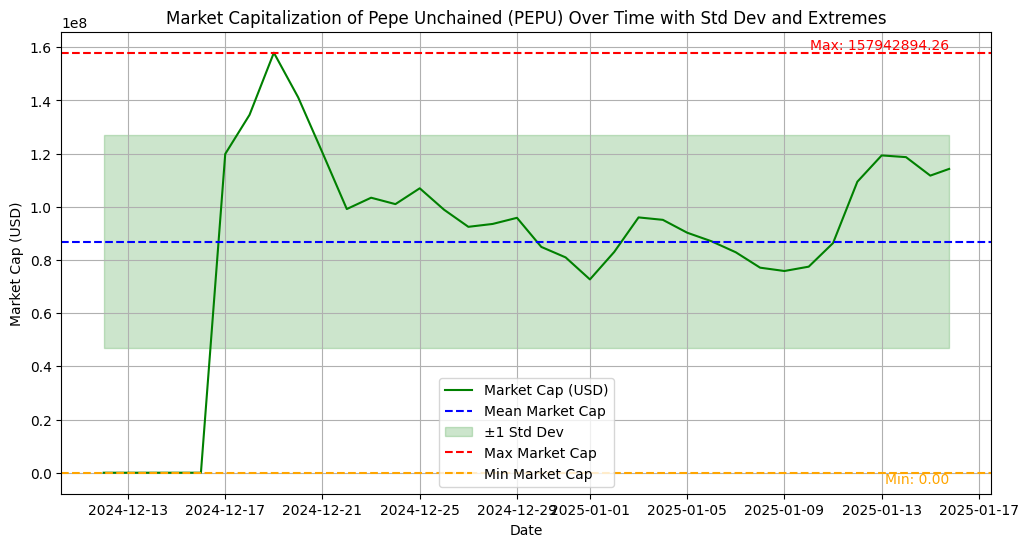

In [11]:
# Calculate mean, standard deviation, maximum and minimum for market cap
mean_market_cap = merged_df['market_cap'].mean()
std_dev_market_cap = merged_df['market_cap'].std()
max_market_cap = merged_df['market_cap'].max()
min_market_cap = merged_df['market_cap'].min()

# Market cap plot with standard deviation and extremes
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['market_cap'], label="Market Cap (USD)", color='green')

# Mean line
plt.axhline(mean_market_cap, color='blue', linestyle='--', label='Mean Market Cap')

# Standard deviation band
plt.fill_between( 
merged_df.index,
 mean_market_cap - std_dev_market_cap,
 mean_market_cap + std_dev_market_cap,
 color='green',
 alpha=0.2,
 label='±1 Std Dev'
)

# Lines for maximum and minimum
plt.axhline(max_market_cap, color='red', linestyle='--', label='Max Market Cap')
plt.axhline(min_market_cap, color='orange', linestyle='--', label='Min Market Cap')

# Annotations for extrema
plt.text(merged_df.index[-1], max_market_cap, f'Max: {max_market_cap:.2f}', color='red', fontsize=10, va='bottom', ha='right')
plt.text(merged_df.index[-1], min_market_cap, f'Min: {min_market_cap:.2f}', color='orange', fontsize=10, va='top', ha='right')

# Chart details
plt.title('Market Capitalization of Pepe Unchained (PEPU) Over Time with Std Dev and Extremes')
plt.xlabel('Date')
plt.ylabel('Market Cap (USD)')
plt.grid(True)
plt.legend()
plt.show()

A market cap that increases after launch and then consolidates around 0.8 (presumably $0.8 billion) indicates strong initial interest.

Consolidation at 0.8 indicates that the market has found an equilibrium between supply and demand and that the cryptocurrency is classified as a "small-cap" (under $1 billion), indicating growth potential but also greater volatility and risk.

A market cap of 0.8 indicates decent liquidity, which is important for investors looking to enter or exit positions.

Growth potential: As it is still a small-cap, there is room for future growth if the project demonstrates value and adoption.

It is important to note that market cap alone is not enough to fully evaluate a cryptocurrency. Other factors such as trading volume, underlying technology, and practical adoption are also relevant.

### Analyses of distribution

Analyzing the price distribution is a crucial step for anyone who wants to study the dynamics of a cryptocurrency. It provides useful insights into the volatility, risks, trends and overall behavior of the market, helping investors and analysts make more informed decisions.

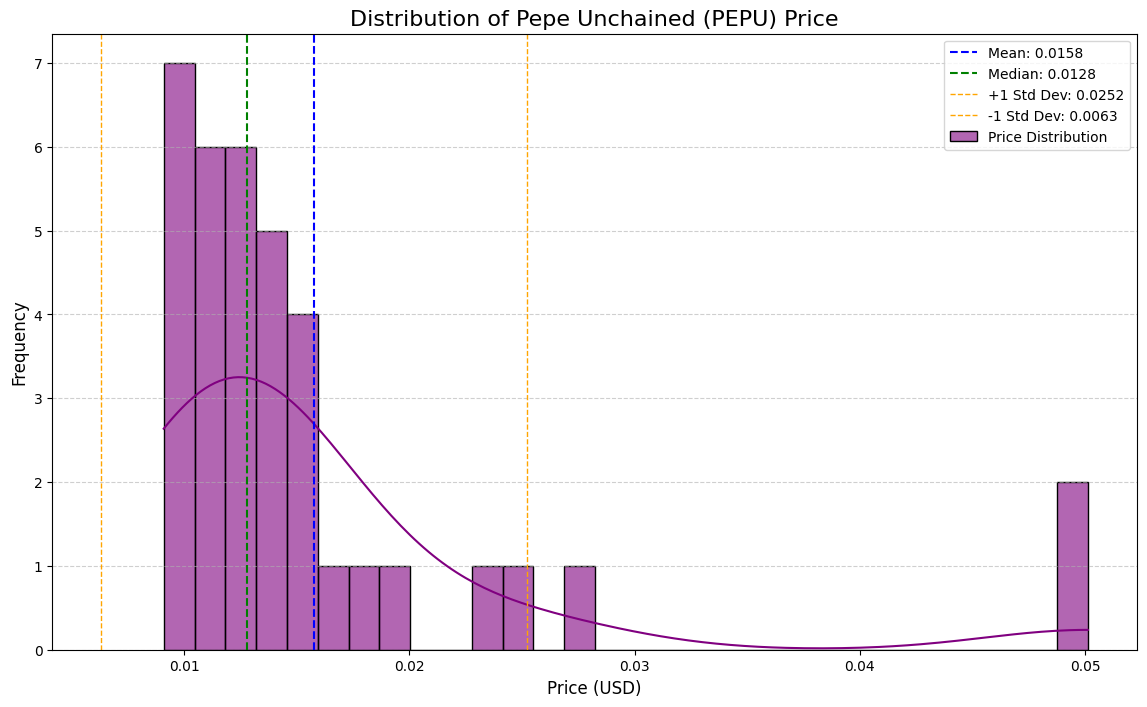

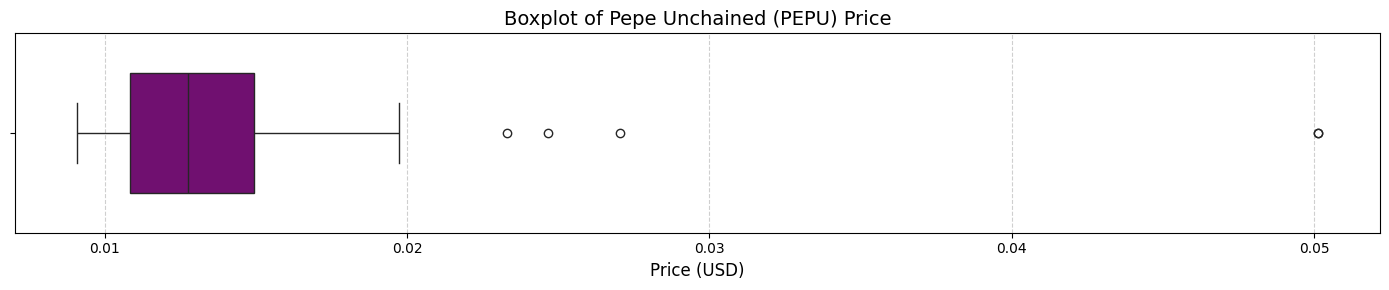

In [12]:
# Key calculations
mean_price = merged_df['price'].mean()
median_price = merged_df['price'].median()
std_dev_price = merged_df['price'].std()

# Creation of the distribution graph
plt.figure(figsize=(14, 8))

# Distribution with density curve
sns.histplot(merged_df['price'], kde=True, bins=30, color='purple', alpha=0.6, label='Price Distribution')

# Line for the average
plt.axvline(mean_price, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_price:.4f}')

# Line for median
plt.axvline(median_price, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_price:.4f}')

# Annotations for standard deviation
plt.axvline(mean_price + std_dev_price, color='orange', linestyle='--', linewidth=1, label=f'+1 Std Dev: {mean_price + std_dev_price:.4f}')
plt.axvline(mean_price - std_dev_price, color='orange', linestyle='--', linewidth=1, label=f'-1 Std Dev: {mean_price - std_dev_price:.4f}')

# Title and labels
plt.title('Distribution of Pepe Unchained (PEPU) Price', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Additional boxplot for quick visual analysis
plt.figure(figsize=(14, 3))
sns.boxplot(x=merged_df['price'], color='purple', width=0.6)
plt.title('Boxplot of Pepe Unchained (PEPU) Price', fontsize=14)
plt.xlabel('Price (USD)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show i charts
plt.tight_layout()
plt.show()

A mean of 0.0158 and a median of 0.0126, indicates that the data may have a slight positive skew (skewed right).

Most of the PEPU trades or prices occur in a lower range (around 0.01 - 0.013), but there are events or market movements that occasionally push the price much higher.
Most investors or traders tend to trade PEPU at these price levels, suggesting an area of ​​equilibrium or stability in the market.

**Trading Strategies:**
You can consider the price levels around 0.01 and 0.013 as potential entry areas or support for the trade.
Prices significantly above the mean could represent selling opportunities in periods of uptrend.

In summary, the price distribution suggests a market with a relatively stable base but occasional price spikes. This may reflect a balance between stability and growth opportunities, but requires attention to the events that cause outliers.

--------------------------------------------------------------------------

Analyzing volume distribution is important because it reveals market liquidity, identifies significant events, and helps predict future price direction, thus providing crucial insights for trading and investment decisions.

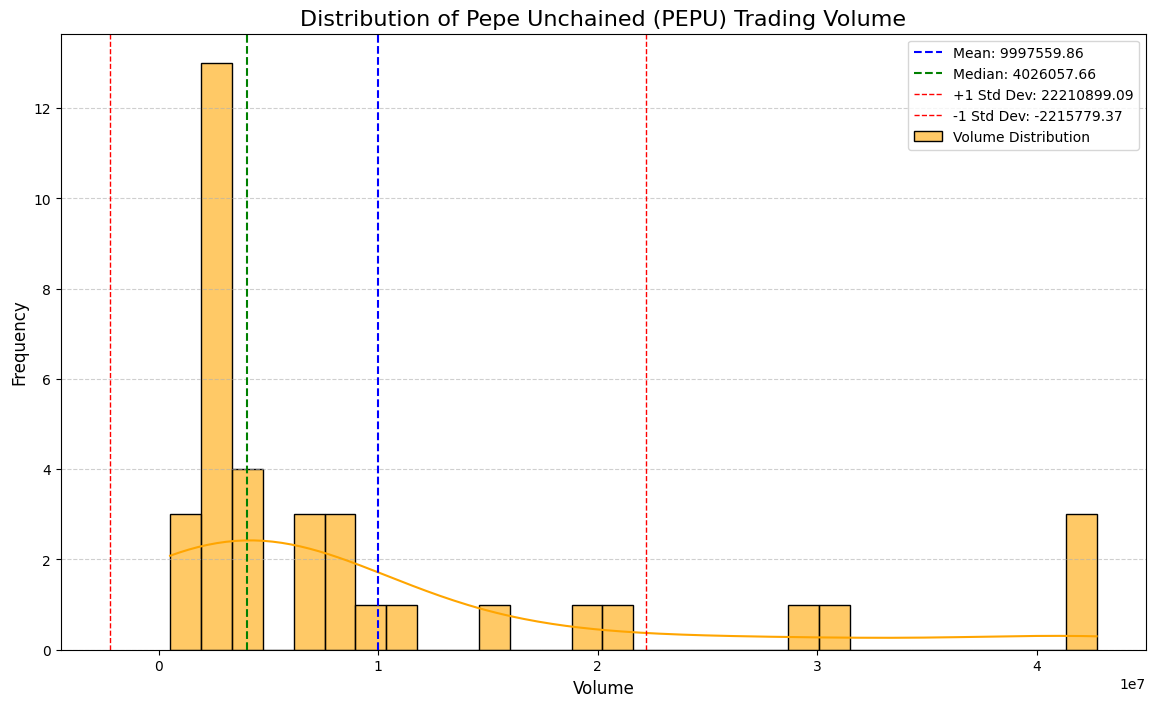

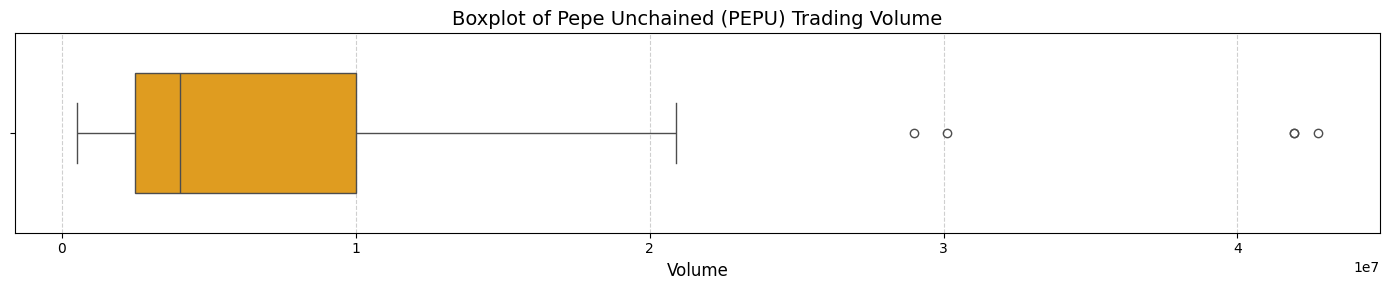

In [13]:
# Key calculations for volume
mean_volume = merged_df['volume'].mean()
median_volume = merged_df['volume'].median()
std_dev_volume = merged_df['volume'].std()

# Creating the volume distribution plot
plt.figure(figsize=(14, 8))

# Distribution with density curve
sns.histplot(merged_df['volume'], kde=True, bins=30, color='orange', alpha=0.6, label='Volume Distribution')

# Line for mean
plt.axvline(mean_volume, color='blue', linestyle='--', linewidth=1.5, label=f'Mean: {mean_volume:.2f}')

# Line for median
plt.axvline(median_volume, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_volume:.2f}')

# Annotations for standard deviation
plt.axvline(mean_volume + std_dev_volume, color='red', linestyle='--', linewidth=1, label=f'+1 Std Dev: {mean_volume + std_dev_volume:.2f}')
plt.axvline(mean_volume - std_dev_volume, color='red', linestyle='--', linewidth=1, label=f'-1 Std Dev: {mean_volume - std_dev_volume:.2f}')

# Title and labels
plt.title('Distribution of Pepe Unchained (PEPU) Trading Volume', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Additional boxplot for quick visual analysis of the volume
plt.figure(figsize=(14, 3))
sns.boxplot(x=merged_df['volume'], color='orange', width=0.6)
plt.title('Boxplot of Pepe Unchained (PEPU) Trading Volume', fontsize=14)
plt.xlabel('Volume', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show i charts
plt.tight_layout()
plt.show()

The distribution of trading volume for Pepe Unchained (PEPU) reveals a highly skewed pattern with the majority of observations concentrated around lower values, as shown by the median (green line) at approximately 3.92 million. The mean (blue line) at 10.17 million is significantly higher, indicating the presence of extreme outliers driving the average up. The standard deviation (red lines) highlights substantial variability in trading activity, with a wide range of volumes observed. This distribution suggests that while most trading occurs at lower volumes, there are occasional spikes reflecting significant market events or increased trading activity.

## Conclusion

The analysis of price, volume, and market capitalization of Pepe Unchained (PEPU) provides initial insights into its behavior and market dynamics. The strong correlation observed between price and volume (0.87) suggests that trading activity significantly influences price movements, while the moderate correlation between market capitalization and price (0.61) indicates that valuation trends align closely with price changes. However, the weak negative correlation between market capitalization and volume (-0.53) hints at possible inconsistencies in market activity and investor engagement.

As a relatively young cryptocurrency, PEPU lacks a comprehensive historical dataset, making the analysis less reliable due to potential market volatility, speculative trading, and limited adoption. These factors also reduce the ability to make confident predictions or establish long-term trends.

#### Future Directions

**Sentiment Analysis**: Investigating social media sentiment and its relationship with price trends could reveal how public perception impacts market performance. Platforms like Twitter, Reddit, and Telegram could provide valuable insights.

**On-Chain Metrics**: Evaluating blockchain activity, such as transaction volume, active wallets, and token distribution, could shed light on the growth of the PEPU ecosystem and user adoption.

**Market Behavior Studies**: Analyzing liquidity, order book depth, and trading pair activity could uncover patterns that influence price volatility and market resilience.

**Comparative Analysis**: Comparing PEPU with other emerging cryptocurrencies could contextualize its performance and highlight unique growth opportunities or risks.
Further research should prioritize longer observation periods and diversified data sources to improve the robustness of future analyses.